In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import sys
import os

# Add the 'src' directory to the Python path to import our custom module
# This allows the notebook to find the data_loader.py file
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data_loader import Au20DataLoader

# Cell 2: Load the data
# The path is relative to the notebook's location
RAW_DATA_PATH = '../data/raw/Au20_OPT_1000/' 

loader = Au20DataLoader(raw_data_path=RAW_DATA_PATH)
df_clusters = loader.load_data()

# Cell 3: Inspect the loaded data
print("Data loaded successfully!")
print("DataFrame Info:")
df_clusters.info()

print("\nFirst 5 rows of the DataFrame:")
df_clusters.head()

Found 999 .xyz files in '../data/raw/Au20_OPT_1000/'.


Parsing XYZ files: 100%|███████████████████████████████████████████| 999/999 [00:00<00:00, 3173.06it/s]

Data loaded successfully!
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           999 non-null    object 
 1   energy       999 non-null    float64
 2   coordinates  999 non-null    object 
dtypes: float64(1), object(2)
memory usage: 23.5+ KB

First 5 rows of the DataFrame:


,id,energy,coordinates
0,0.xyz,-1547.657785,"[[1.89684994, -1.133e-05, 1.56761017], [-1.896..."
1,1.xyz,-1552.612539,"[[-1.90290912, 0.01511228, -1.01875478], [1.90..."
2,10.xyz,-1555.417784,"[[-2.28259657, 0.12722234, -1.87854145], [2.28..."
3,100.xyz,-1552.217633,"[[1.90024748, 0.15274427, -0.0], [-1.90024748,..."
4,101.xyz,-1552.886542,"[[4.67646043, 1.01968739, 0.0], [-4.67646043, ..."


--- Statistical Analysis of Au20 Cluster Energies ---
Number of structures: 999
Mean Energy:              -1551.249569
Median Energy:            -1551.656057
Variance of Energy:         8.268491
Standard Deviation:       2.875498
Skewness of Energy:         1.153909
Energy Range (Min to Max):  -1557.209460 to -1530.908363
-----------------------------------------------------


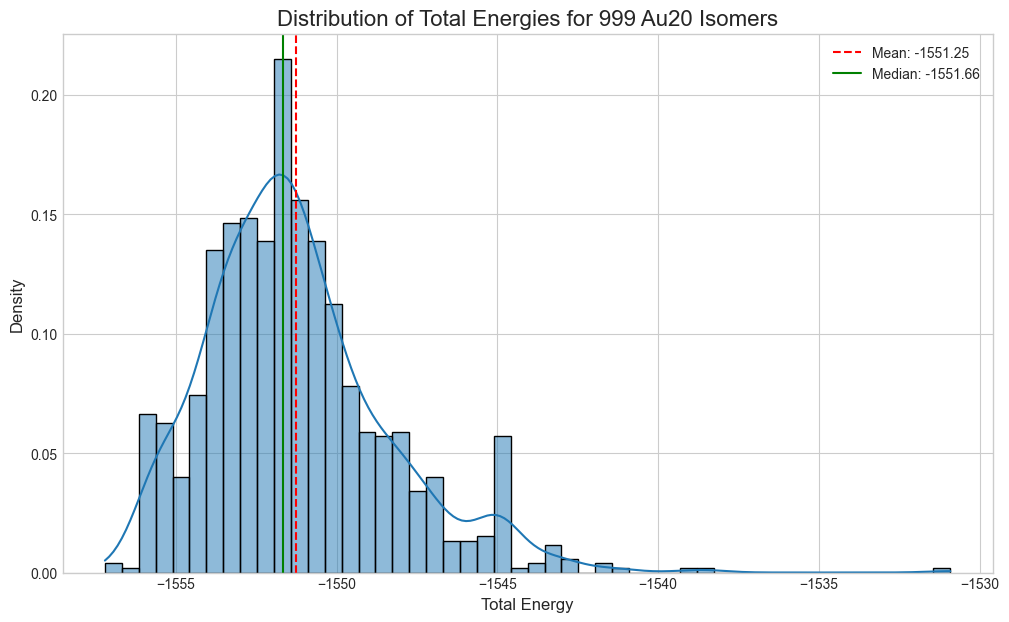

In [2]:
# Cell 4: Statistical Analysis of Energy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# --- Calculate Core Metrics ---
mean_energy = df_clusters['energy'].mean()
variance_energy = df_clusters['energy'].var()
std_dev_energy = df_clusters['energy'].std()
skewness_energy = df_clusters['energy'].skew() # Pandas has a built-in skew function
median_energy = df_clusters['energy'].median()
min_energy = df_clusters['energy'].min()
max_energy = df_clusters['energy'].max()

# --- Print a Formatted Summary ---
print("--- Statistical Analysis of Au20 Cluster Energies ---")
print(f"Number of structures: {len(df_clusters)}")
print(f"Mean Energy:              {mean_energy:.6f}")
print(f"Median Energy:            {median_energy:.6f}")
print(f"Variance of Energy:         {variance_energy:.6f}")
print(f"Standard Deviation:       {std_dev_energy:.6f}")
print(f"Skewness of Energy:         {skewness_energy:.6f}")
print(f"Energy Range (Min to Max):  {min_energy:.6f} to {max_energy:.6f}")
print("-----------------------------------------------------")


# Cell 5: Visualization of Energy Distribution
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot histogram and Kernel Density Estimate (KDE)
sns.histplot(df_clusters['energy'], kde=True, ax=ax, stat="density", bins=50)

# Add vertical lines for mean and median
ax.axvline(mean_energy, color='r', linestyle='--', label=f'Mean: {mean_energy:.2f}')
ax.axvline(median_energy, color='g', linestyle='-', label=f'Median: {median_energy:.2f}')

# Formatting
ax.set_title('Distribution of Total Energies for 999 Au20 Isomers', fontsize=16)
ax.set_xlabel('Total Energy', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend()

plt.show()